# Day 24 – Activation Functions
### ReLU vs Sigmoid — How Activation Shapes Learning

Today, we’ll compare two popular activation functions — **Sigmoid** and **ReLU** — to understand how they affect learning, convergence, and accuracy.

#### Goals:
- Understand why activations are essential for non-linear learning.
- Compare **Sigmoid** and **ReLU** on the same dataset.
- Visualize how activation choice affects training dynamics.
- Build intuition for activation selection in real-world models.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

## 1. Create and Preprocess Dataset

In [2]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

## 2. Define MLP Architectures (Sigmoid vs ReLU)

In [3]:
class MLP_Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(16, 1)
        self.out = nn.Sigmoid()
    def forward(self, x):
        return self.out(self.fc2(self.act1(self.fc1(x))))

class MLP_ReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.out = nn.Sigmoid()
    def forward(self, x):
        return self.out(self.fc2(self.act1(self.fc1(x))))

## 3. Helper Function – Decision Boundary Visualization

In [4]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, cmap='coolwarm', alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.show()

## 4. Train Both Models

In [5]:
def train_model(model, optimizer, criterion, X_train, y_train, epochs=50):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        preds = model(X_train)
        loss = criterion(preds, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

sigmoid_model = MLP_Sigmoid()
relu_model = MLP_ReLU()

criterion = nn.BCELoss()
opt_sigmoid = optim.SGD(sigmoid_model.parameters(), lr=0.1)
opt_relu = optim.SGD(relu_model.parameters(), lr=0.1)

loss_sigmoid = train_model(sigmoid_model, opt_sigmoid, criterion, X_train, y_train)
loss_relu = train_model(relu_model, opt_relu, criterion, X_train, y_train)

## 5. Compare Loss Curves

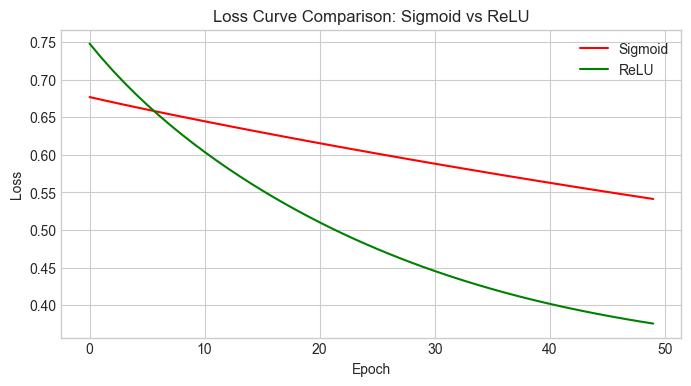

In [6]:
plt.figure(figsize=(8,4))
plt.plot(loss_sigmoid, label='Sigmoid', color='red')
plt.plot(loss_relu, label='ReLU', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison: Sigmoid vs ReLU')
plt.legend()
plt.show()

## 6. Visualize Decision Boundaries

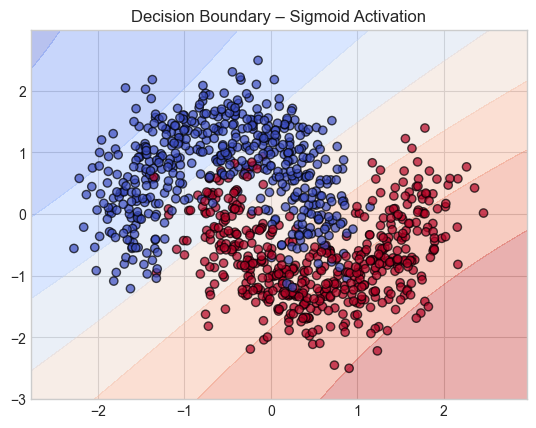

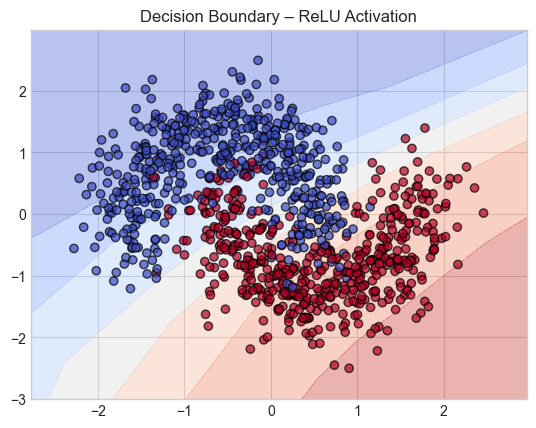

In [7]:
plot_decision_boundary(sigmoid_model, X, y, title='Decision Boundary – Sigmoid Activation')
plot_decision_boundary(relu_model, X, y, title='Decision Boundary – ReLU Activation')

## 7. Evaluate Accuracy

In [8]:
def evaluate(model):
    with torch.no_grad():
        preds = (model(X_test) > 0.5).float()
    acc = (preds.eq(y_test).sum() / y_test.shape[0]).item()
    return acc

acc_sigmoid = evaluate(sigmoid_model)
acc_relu = evaluate(relu_model)

print(f'Sigmoid Accuracy: {acc_sigmoid*100:.2f}%')
print(f'ReLU Accuracy: {acc_relu*100:.2f}%')

Sigmoid Accuracy: 85.00%
ReLU Accuracy: 86.00%


## ✅ Summary
- Compared **Sigmoid** vs **ReLU** activations on the same dataset.
- Observed **ReLU** trains faster and reaches better accuracy.
- Visualized how activation shapes the decision boundary.
- Understood why **ReLU** is preferred in deep networks (avoids vanishing gradient).

**Deliverable:** `day24_activation_functions.ipynb`